In [1]:
import csv
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.decomposition import PCA
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LinearRegression
import string
%matplotlib inline 

In [2]:
def cleanToLetters(str):
    remainingChars = []
    for ch in str:
        if (ch in string.ascii_letters or ch == ' '):
            remainingChars.append(ch)
    newString = string.join(remainingChars, "")
    return newString.lower()

In [3]:
def removeStopWords(str, set):
    toks = str.split()
    new_toks = []
    for elem in toks:
        if elem not in set:
            new_toks.append(elem)
    return string.join(new_toks, " ");

In [4]:
def printMostCommonWords(vectorizer, component):
    cuttOff = max(abs(component)) - 0.02
    for i in range(0, len(component)):
        if abs(component[i]) > cuttOff:
            for key, value in vectorizer.vocabulary_.iteritems():
                if (value == i):
                    print key

In [5]:
#vectorizer = CountVectorizer(min_df=1, stop_words = None)
#stop_words = vectorizer.get_stop_words()
stop_words = ['you', 'the', 'and', 'a', 'an', 'how', 'as', 'or', 'we', 'i', 'be']

In [6]:
removeStopWords("Hello dog, i see a good very dog", stop_words)

'Hello dog, see good very dog'

In [7]:
studentIds = []
passingIndicators = []
responses = []
rawReponses = []
grades = []
responses_w_stop_words = []
with open('schell9.txt', 'rb') as csvfile:
    responseReader = csv.reader(csvfile, delimiter="\t")
    i = 0
    for row in responseReader:
        studentId = row[0]
        course = row[6]
        numericGrade = row[9]
        letterGrade = row[10]
        response = row[13]
        if float(numericGrade) < 70:
            passingIndicator = 0
        else:
            passingIndicator = 1;
        if (True or course == 'M 408N'):
            if "xml" not in response and "0px" not in response and not "img" in response:
                studentIds.append(int(studentId))
                rawReponses.append(response)
                grades.append(float(numericGrade))
                cleaned = cleanToLetters(response)
                responses_w_stop_words.append(cleaned)
                cleaned_no_stop_words = removeStopWords(cleaned, stop_words)
                responses.append(cleaned_no_stop_words)
                passingIndicators.append(passingIndicator)

In [8]:
data = {'studentId' : studentIds, 'grades' : grades, 'pass' : passingIndicators, 'responses' : responses, "raw" : rawReponses}
frame = pd.DataFrame(data)
#frame.head()
frame[frame["studentId"] == 1486607]


,grades,pass,raw,responses,studentId
475,83.668937,1,"I don't quite understand what arcs in means,a...",dont quite understand what arcs in meansas wel...,1486607
1665,83.668937,1,I'm still kind of confused on finding the lim...,im still kind of confused on finding limit x a...,1486607
1666,83.668937,1,"I understood this module well, I just didn't ...",understood this module well just didnt identif...,1486607
1667,83.668937,1,The first few problems where the x approached...,first few problems where x approached didnt qu...,1486607
1668,83.668937,1,You are awesome. Keep up the good videos.,are awesome keep up good videos,1486607
1669,83.668937,1,I'm still confused on how to find limits of c...,im still confused on to find limits of certain...,1486607
1670,83.668937,1,How to use the rules of limits when applied t...,to use rules of limits when applied to problem...,1486607
1671,83.668937,1,Graphing the products of two functions and fi...,graphing products of two functions finding dis...,1486607


In [9]:

groupedStudentIds = []
groupedPassingIndicators = []
groupedResponses = []
groupedGrades = []
for name, group in frame.groupby('studentId'):
    groupedStudentIds.append(name)
    groupedGrades.append(group['grades'].max())
    groupedPassingIndicators.append(group['pass'].max())
    groupedResponses.append(string.join(group['responses'].tolist(), '*'))

groupedData = {'studentId' : groupedStudentIds, 'grades' : groupedGrades, 
               'pass' : groupedPassingIndicators, 'responses' : groupedResponses}
groupedFrame = pd.DataFrame(groupedData)
groupedFrame.head()


,grades,pass,responses,studentId
0,83.668937,1,dont quite understand what arcs in meansas wel...,1486607
1,91.913717,1,to compute inverse trigonometry*figuring out w...,1486608
2,80.108808,1,nothing*had trouble with last question which a...,1486609
3,90.550902,1,am little confused to are supposed to deal wit...,1486610
4,99.416510,1,one with add subtraction of logs with same bas...,1486611


In [10]:
vectorizer = CountVectorizer(min_df=8, max_df = 0.05, ngram_range = (1, 4))

In [11]:
wordVector = vectorizer.fit_transform(groupedResponses)

In [12]:
wordVector.shape

(654, 4341)

In [13]:
vectorizer.vocabulary_

{u'dne': 806,
 u'way that': 4094,
 u'me still': 2183,
 u'fit': 1145,
 u'functions their': 1292,
 u'rates questions': 3022,
 u'nothing do': 2445,
 u'is very confusing': 1778,
 u'under curve is': 3875,
 u'them into': 3497,
 u'asked about': 268,
 u'module everything': 2231,
 u'exact': 995,
 u'following': 1147,
 u'bit difficult': 349,
 u'of when': 2627,
 u'when function is': 4154,
 u'local max': 2088,
 u'know to use': 1905,
 u'graphed': 1398,
 u'idea to do': 1517,
 u'if limit is': 1532,
 u'like to go over': 2005,
 u'will need': 4227,
 u'at this': 296,
 u'having hard time': 1482,
 u'even though': 971,
 u'am still confuse': 161,
 u'know where to': 1913,
 u'in denominator': 1600,
 u'steps to': 3308,
 u'become': 331,
 u'was really': 4070,
 u'finding value': 1131,
 u'last question got': 1945,
 u'with absolute': 4231,
 u'having to': 1485,
 u'hard for me': 1448,
 u'see it relates': 3160,
 u'were very': 4117,
 u'combination of': 483,
 u'whether function': 4197,
 u'everything nothing': 989,
 u'dont

In [14]:
len(vectorizer.vocabulary_)

4341

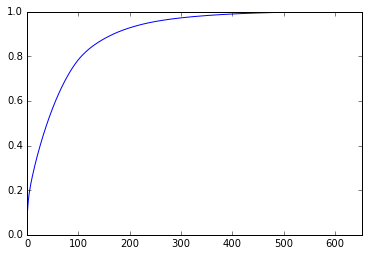

In [15]:
# View the accumulated sum of the eigenvalue ratios looking for the "elbow" to use as a cut off
pca = PCA(n_components=1000)
pca.fit(wordVector.toarray())

l = []
for i in range(0, len(pca.explained_variance_ratio_)):
    accumulatedVariance = sum(pca.explained_variance_ratio_[0:(i+1)])
    l.append(accumulatedVariance)
             
s = pd.Series(l)
s.plot()

In [16]:
# Obtain the base vectors for a 200 dimensional space.
pca = PCA(n_components=150)
pca.fit(wordVector.toarray())
sum(pca.explained_variance_ratio_)

0.87693137238668195

In [17]:
printMostCommonWords(vectorizer, pca.components_[0])

at this
moment


In [18]:
printMostCommonWords(vectorizer, pca.components_[1])

at this


In [19]:
printMostCommonWords(vectorizer, pca.components_[2])

about this module


In [20]:
printMostCommonWords(vectorizer, pca.components_[3])

about what
am not sure
confused about what
thank am


In [21]:
printMostCommonWords(vectorizer, pca.components_[4])

all is
is good


In [22]:
wordVectorReduced = pca.transform(wordVector.toarray())

In [23]:
Y = np.array(groupedGrades, dtype = float)

In [24]:
X = pd.DataFrame(wordVectorReduced)

In [25]:
X.head()

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,-0.939214,-0.113796,0.053737,-0.131053,0.012376,-0.192546,0.100169,-0.027964,0.217603,-0.015537,...,-0.324421,0.434844,0.317777,0.263671,-0.470271,-0.381115,-0.069909,-0.261643,0.599891,0.345335
1,-1.344549,-0.038564,0.139125,-0.269589,0.050672,-0.002394,-0.000483,-0.028123,0.111422,-0.018598,...,0.468006,-0.163751,0.091422,-0.386254,0.357976,0.031456,-0.181632,-0.038260,-0.253845,0.040151
2,-0.436567,0.022660,-0.261957,0.192152,0.006862,-0.002276,-0.016841,-0.021269,0.686428,-0.143792,...,-1.626458,-0.612133,-0.178442,0.461800,0.909185,1.153591,-0.578845,2.126840,-0.576396,0.606540
3,-1.499052,-0.018731,0.241111,-0.222752,0.049289,-0.050902,-0.169731,0.042641,0.009398,-0.031420,...,0.510392,0.090896,-0.203584,0.114747,0.146711,0.077825,0.072113,-0.092338,-0.113013,-0.005155
4,-1.533811,0.015651,0.243295,-0.264286,-0.002790,-0.080213,-0.101182,0.021410,-0.048782,0.055495,...,-0.015676,-0.049342,0.084034,0.056423,0.083852,-0.061086,-0.067894,-0.002202,-0.063904,-0.028692


In [26]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [27]:
lm.fit(X, Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

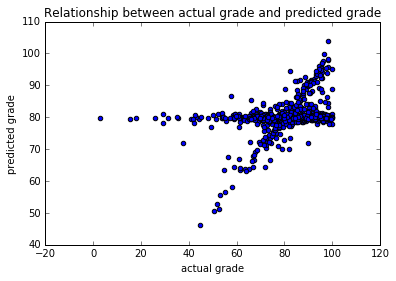

In [28]:
# your turn
plt.scatter(Y, lm.predict(X))
plt.xlabel("actual grade")
plt.ylabel("predicted grade")
plt.title("Relationship between actual grade and predicted grade")

In [29]:
print np.mean((Y - lm.predict(X)) ** 2)

157.19660384


In [30]:
print np.mean((Y - np.mean(Y)) ** 2)

190.608078648
